<a href="https://colab.research.google.com/github/Danila-programist/Numerical-methods/blob/main/ODE_BVP_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Приближённое решение краевой задачи для обыкновенного дифференциального уравнения

Найти приближённое решение краевой задачи для обыкновенного дифференциального уравнения на отрезке $ [0, 1] $ cеточным методом на равномерной сетке. Для вычисления решения использовать метод прогонки. Для сравнения приведено точное решение $ u_{0}(x) $.

1. Ознакомиться с параграфом 2.1.4 первой части первой части учебника Калиткина
2. Написать функцию, реализующую метод прогонки (функция получает коэффициенты системы линейных уравнений, возвращает значения корней). Составить тестовую задачу для этой функции (СЛАУ), убедиться что реализация корректная.
3. Ознакомиться с параграфами 1.4.1, 1.4.2 второй части учебника Калиткина.

  *Указание: формула (1.132) содержит опечатку. Вместо $x$ должно быть $u$.*
3. Построить разностную схему для вашего ОДУ. Использовать разностные производные второго порядка точности
4. Используя аппроксимацию граничных условий **первого** порядка точности, получить приближенное решение краевой задачи при $ N = 10, 20, 40, 80, 160 $, вычислить норму погрешности, используя точное решение. Аналогично, найдите норму погрешности приближенного решения при использовании аппроксимации граничных условий со **вторым** порядком точности. На одном рисунке изобразите графики зависимости погрешности от шага сетки (или от количества узлов) в логарифмическом масштабе. По полученным графикам проверьте корректность вашей программы.

  *Указания: нужно использовать реализованный вами метод прогонки. Это значит, что вам нужно составить СЛАУ определенного вида. Вам может понадобиться применить элементарные преобразования СЛАУ, чтобы привести систему к нужному виду*


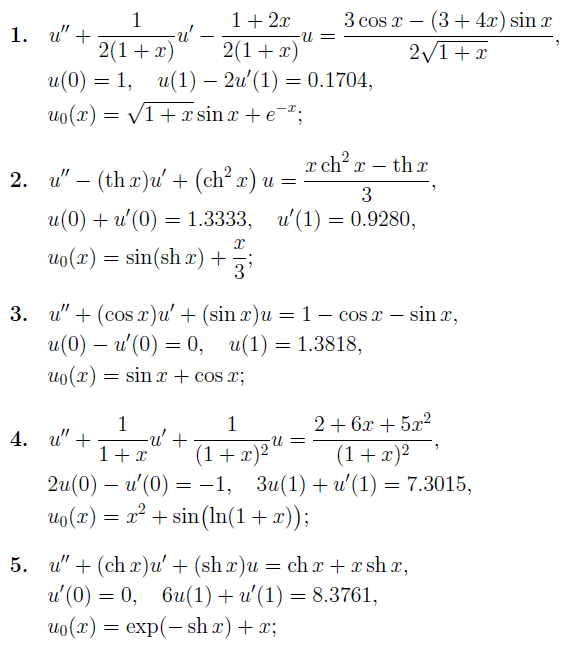

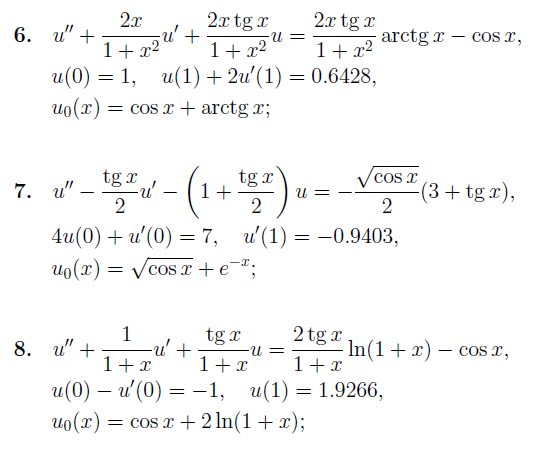

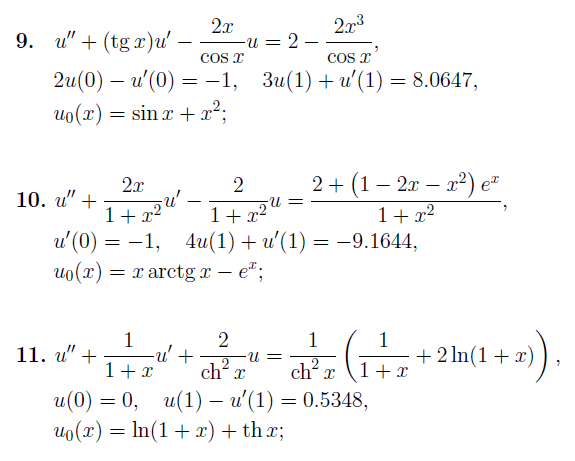

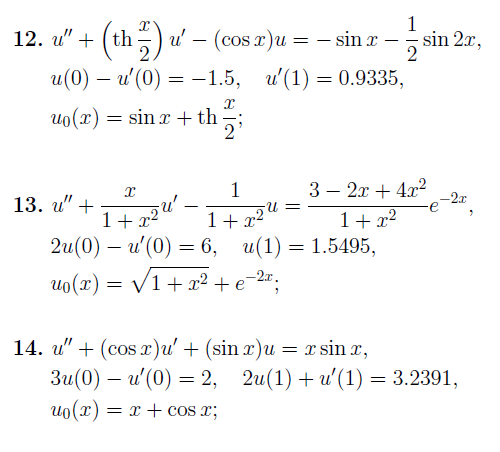

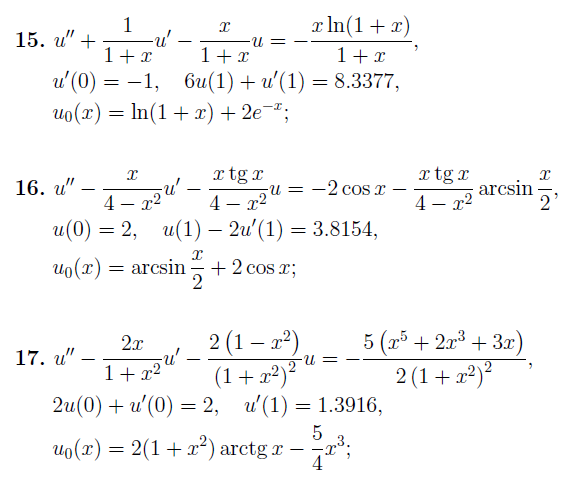

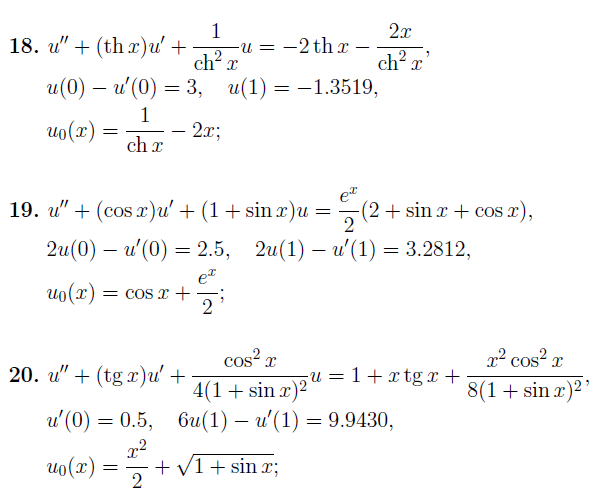

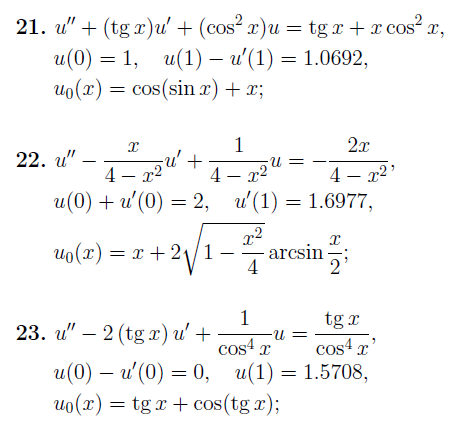

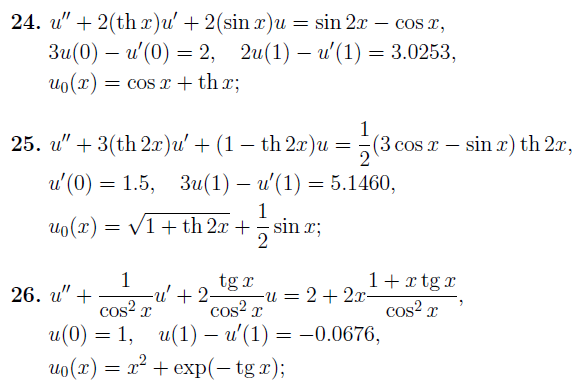

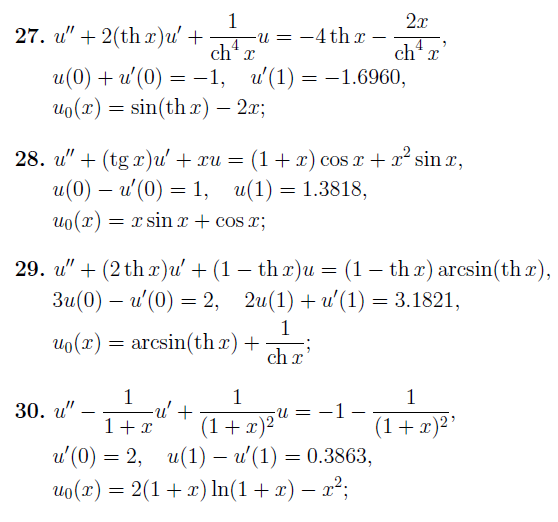